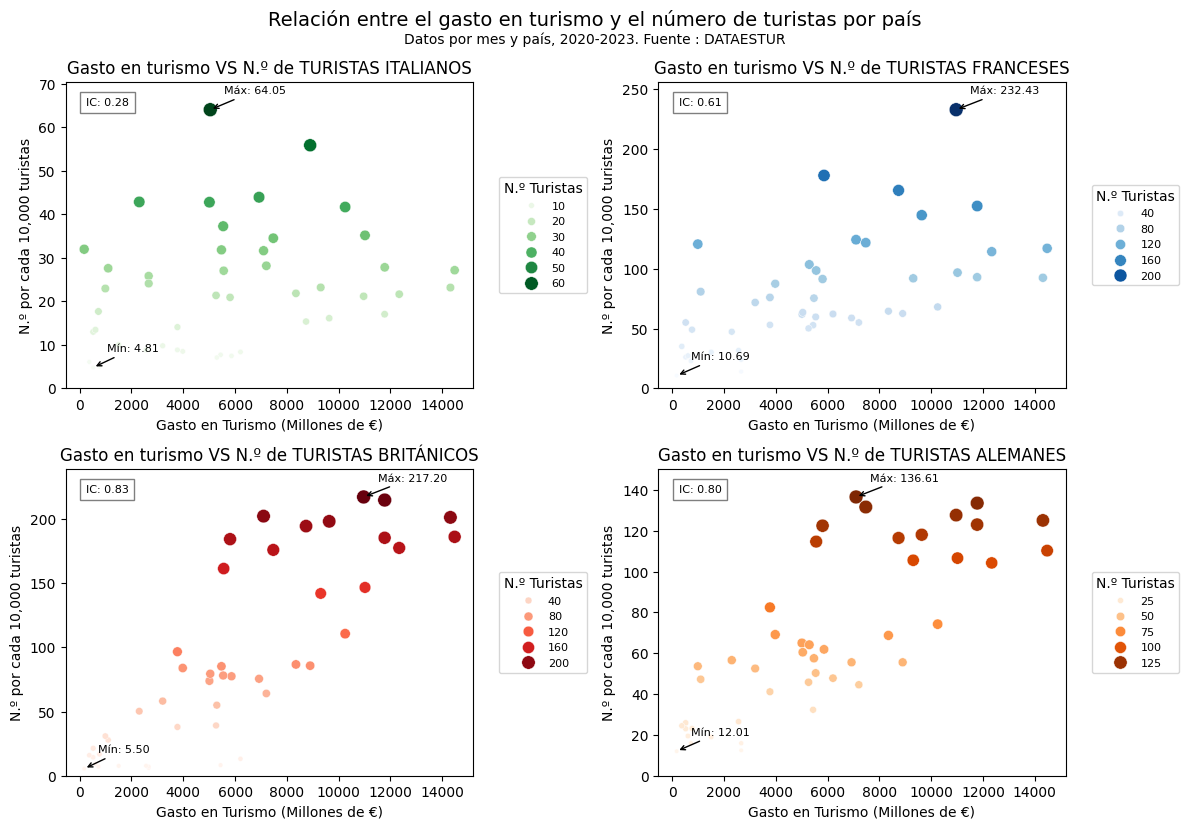

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Cargamos el DataFrame desde el archivo
DF = pd.read_excel('egatur.xlsx')
DF['GASTO (€)'] = DF['GASTO (€)'] / 1000000

# Lista de países
paises = ['TURISTAS ITALIANOS', 'TURISTAS FRANCESES', 'TURISTAS BRITÁNICOS', 'TURISTAS ALEMANES']

# Creamos una lista de paletas de colores
paletas = ['Greens', 'Blues', 'Reds', 'Oranges']

# Dividir el número de turistas por 10,000
for pais in paises:
    DF[pais] = DF[pais] / 10000

# Creamos los scatterplots para cada país
plt.figure(figsize=(12, 8.5))

# Título y subtítulo
plt.suptitle('Relación entre el gasto en turismo y el número de turistas por país', fontsize=14)
plt.figtext(0.5, 0.94, 'Datos por mes y país, 2020-2023. Fuente : DATAESTUR', ha='center', fontsize=10)

for pais, paleta in zip(paises, paletas):
    ax = plt.subplot(2, 2, paises.index(pais) + 1)
    sns.scatterplot(data=DF, x='GASTO (€)', y=pais, hue=pais, palette=paleta, size=pais, sizes=(10, 100))
    plt.title(f'Gasto en turismo VS N.º de {pais}', fontsize=12)
    plt.xlabel('Gasto en Turismo (Millones de €)', fontsize=10)
    plt.ylabel(f'N.º por cada 10,000 turistas', fontsize=10)

    # Añadir etiquetas de valores máximo y mínimo
    max_value = DF[pais].max()
    min_value = DF[pais].min()
    plt.annotate(f'Máx: {max_value:.2f}', xy=(DF['GASTO (€)'].iloc[DF[pais].idxmax()], max_value),
                 xytext=(10, 10), textcoords='offset points', fontsize=8, va='bottom', ha='left', color='black',
                 arrowprops=dict(arrowstyle='->', color='black'))
    plt.annotate(f'Mín: {min_value:.2f}', xy=(DF['GASTO (€)'].iloc[DF[pais].idxmin()], min_value),
                 xytext=(10, 10), textcoords='offset points', fontsize=8, va='bottom', ha='left', color='black',
                 arrowprops=dict(arrowstyle='->', color='black'))

    # Calculamos el coeficiente de correlación
    corr = DF['GASTO (€)'].corr(DF[pais])
    plt.text(0.05, 0.95, f'IC: {corr:.2f}', transform=ax.transAxes, fontsize=8, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    # Fijamos los límites del eje Y
    ax.set_ylim(0, max_value * 1.1)

    # Movemos la leyenda fuera del gráfico
    plt.legend(title=f'N.º Turistas', fontsize=8, bbox_to_anchor=(1.05, 0.5), loc='center left')

# Ajustamos el espacio entre el subtítulo y los gráficos
plt.tight_layout(rect=[0, 0.01, 1, 0.98])

# Mostramos los scatterplots
plt.show()
